In [1]:
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import os

In [2]:
file = os.path.join('kc_crime_for_visualizations.csv')
data = pd.read_csv(file)
file2 = os.path.join('kc_crime_for_visualizations.csv')
data2 = pd.read_csv(file2)

In [3]:
data.head()

,Date,Hour,Crime,Zip,Race,Sex,Age,Firearm,Latitude,Longitude,Month
0,2017-05-28,3,Stolen_Property,64111,W,F,29.0,N,39.053635,-94.595998,5
1,2017-11-21,13,Homicide_Non_Negl,64105,B,F,69.0,Y,39.100910,-94.577328,11
2,2017-08-02,13,Auto_Theft,64119,W,F,31.0,N,39.177440,-94.572069,8
3,2017-08-24,16,Intimidation,64130,W,F,19.0,N,39.033505,-94.547812,8
4,2017-03-15,14,Auto_Theft,64157,W,F,62.0,N,39.235881,-94.466171,3


In [4]:
data2.head()

,Date,Hour,Crime,Zip,Race,Sex,Age,Firearm,Latitude,Longitude,Month
0,2017-05-28,3,Stolen_Property,64111,W,F,29.0,N,39.053635,-94.595998,5
1,2017-11-21,13,Homicide_Non_Negl,64105,B,F,69.0,Y,39.100910,-94.577328,11
2,2017-08-02,13,Auto_Theft,64119,W,F,31.0,N,39.177440,-94.572069,8
3,2017-08-24,16,Intimidation,64130,W,F,19.0,N,39.033505,-94.547812,8
4,2017-03-15,14,Auto_Theft,64157,W,F,62.0,N,39.235881,-94.466171,3


In [5]:
data2['Male'] = pd.Series(np.where(data2.Sex.values == 'M', 1, 0), data2.index)

In [6]:
data2.head()

,Date,Hour,Crime,Zip,Race,Sex,Age,Firearm,Latitude,Longitude,Month,Male
0,2017-05-28,3,Stolen_Property,64111,W,F,29.0,N,39.053635,-94.595998,5,0
1,2017-11-21,13,Homicide_Non_Negl,64105,B,F,69.0,Y,39.100910,-94.577328,11,0
2,2017-08-02,13,Auto_Theft,64119,W,F,31.0,N,39.177440,-94.572069,8,0
3,2017-08-24,16,Intimidation,64130,W,F,19.0,N,39.033505,-94.547812,8,0
4,2017-03-15,14,Auto_Theft,64157,W,F,62.0,N,39.235881,-94.466171,3,0


In [7]:
data['Gender'] = pd.Series(np.where(data.Sex.values == 'M', 1, 0), data.index)
data = data.drop(['Sex'], axis=1)

In [8]:
data2.head()

,Date,Hour,Crime,Zip,Race,Sex,Age,Firearm,Latitude,Longitude,Month,Male
0,2017-05-28,3,Stolen_Property,64111,W,F,29.0,N,39.053635,-94.595998,5,0
1,2017-11-21,13,Homicide_Non_Negl,64105,B,F,69.0,Y,39.100910,-94.577328,11,0
2,2017-08-02,13,Auto_Theft,64119,W,F,31.0,N,39.177440,-94.572069,8,0
3,2017-08-24,16,Intimidation,64130,W,F,19.0,N,39.033505,-94.547812,8,0
4,2017-03-15,14,Auto_Theft,64157,W,F,62.0,N,39.235881,-94.466171,3,0


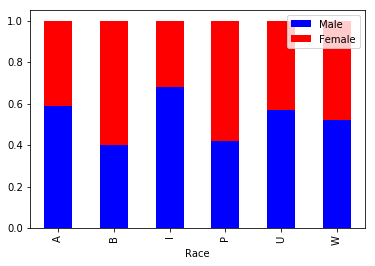

In [9]:
# For Visualizations

data2['Female'] = 1 - data2['Male']
data2.groupby('Race').agg('mean')[['Male', 'Female']].plot(kind='bar', stacked=True, color=['b', 'r']);
plt.show()

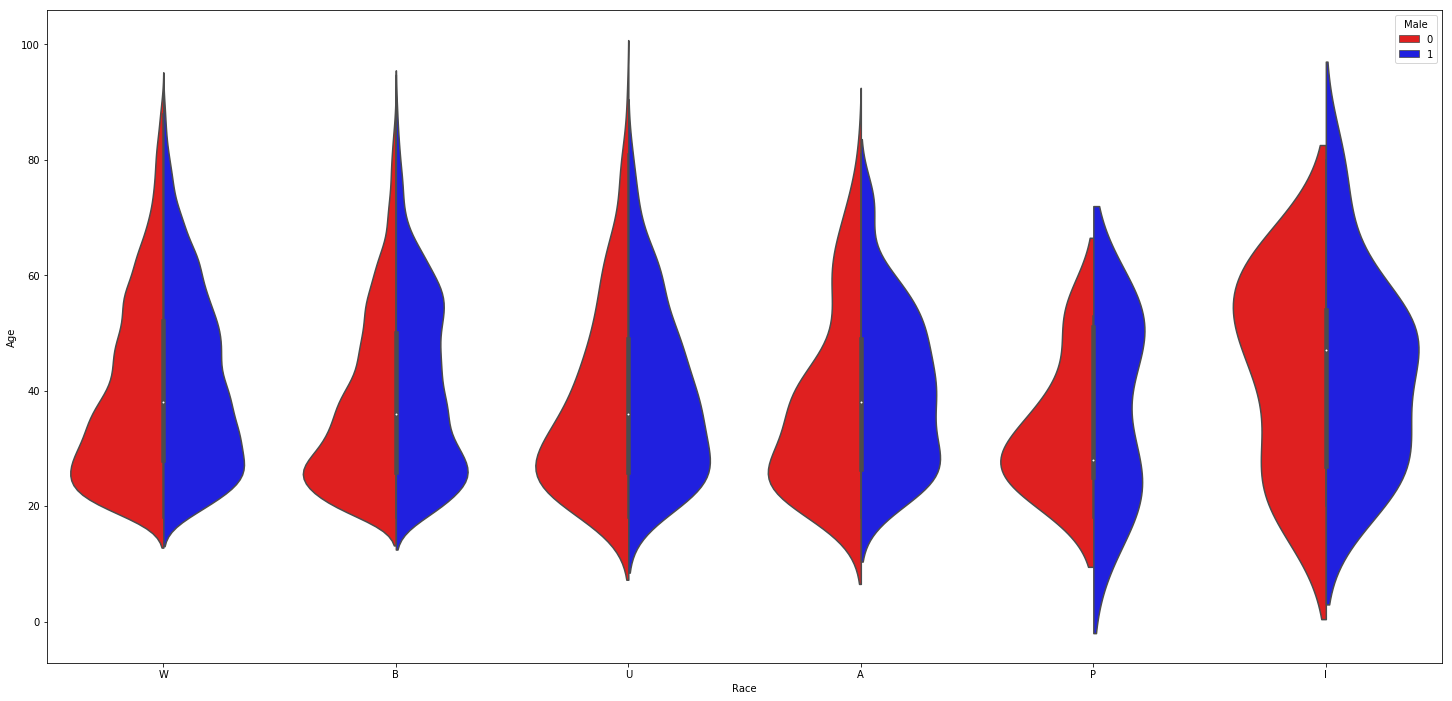

In [10]:
fig = plt.figure(figsize=(25, 12))
sns.violinplot(x='Race', y='Age', 
               hue='Male', data=data2, 
               split=True,
               palette={0: "r", 1: "b"}
              );
plt.show()

C:\Users\Mark\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


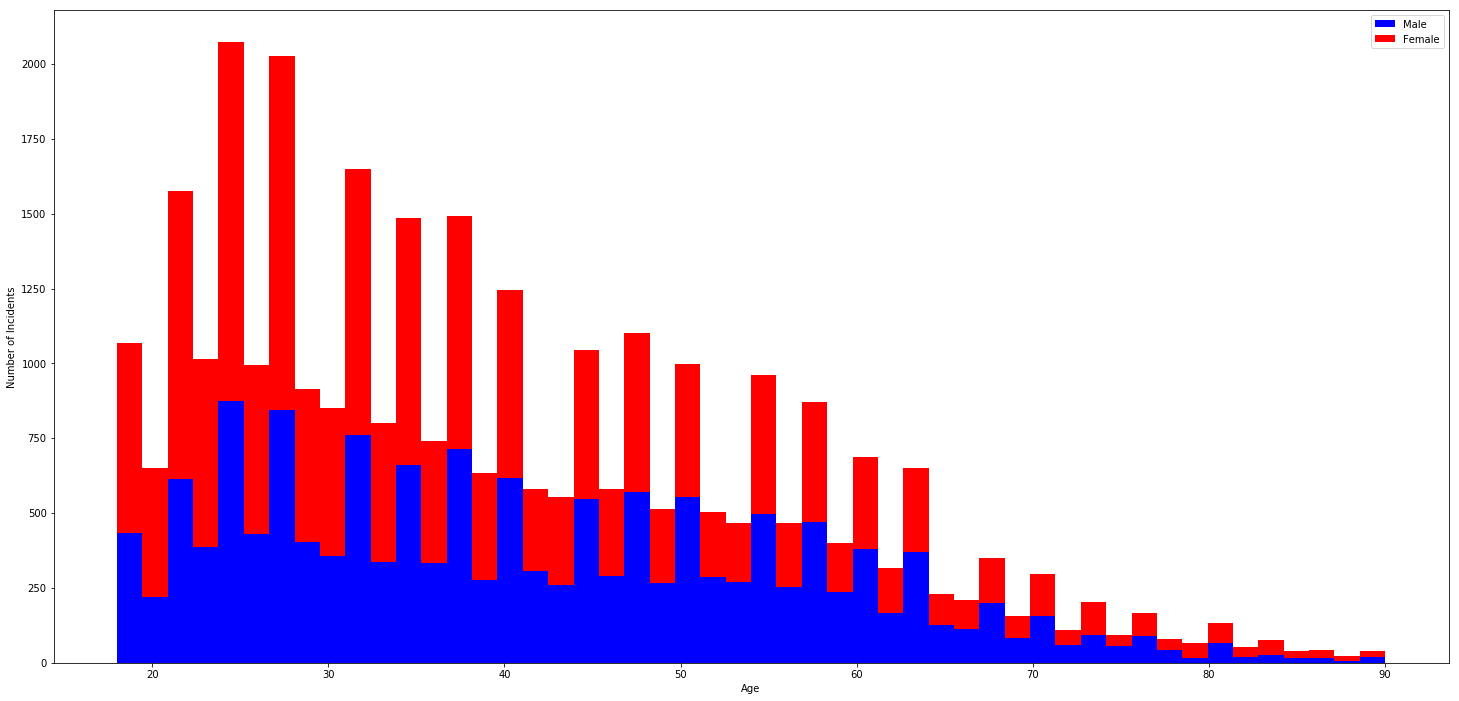

In [11]:
figure = plt.figure(figsize=(25, 12))
plt.hist([data2[data2['Male'] == 1]['Age'], data2[data2['Male'] == 0]['Age']], 
         stacked=True, color = ['b','r'],
         bins = 50, label = ['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.legend();
plt.show()

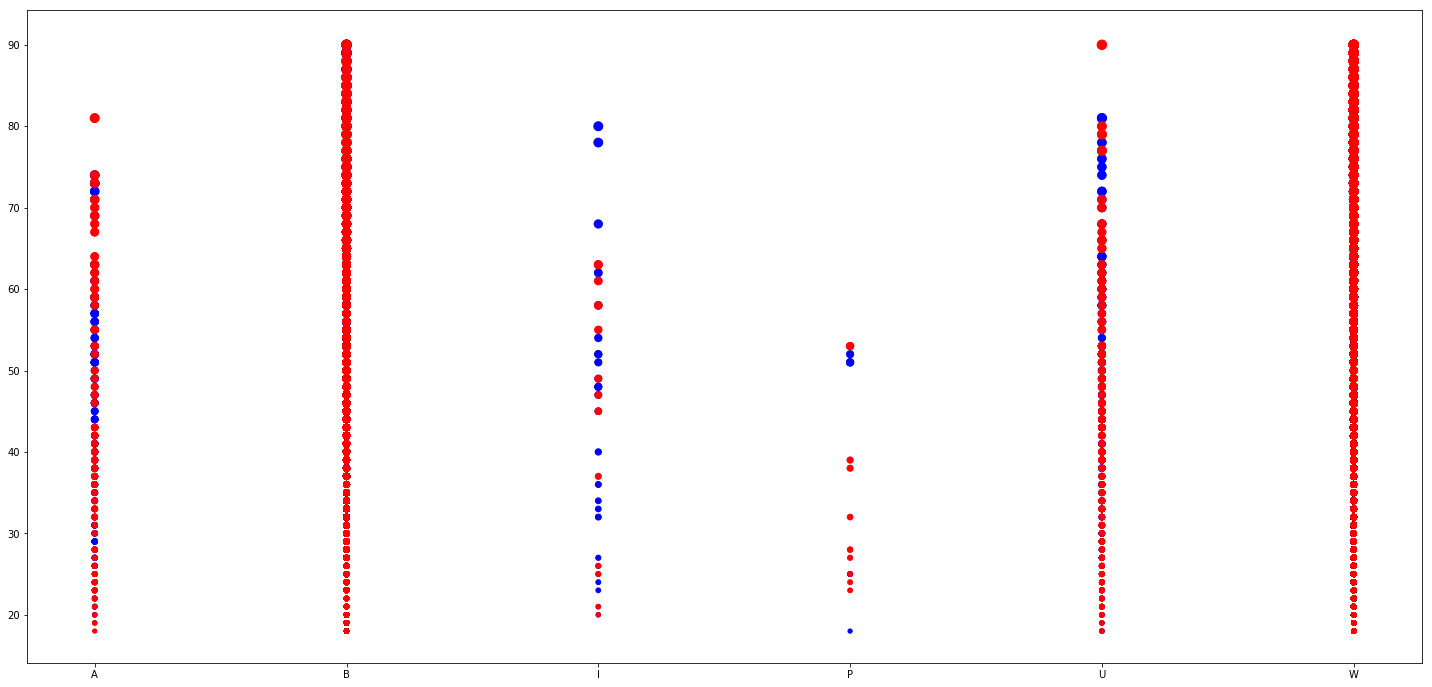

In [12]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data2[data2['Male'] == 1]['Race'], data2[data2['Male'] == 1]['Age'], 
           c='blue', s=data2[data2['Male'] == 1]['Age'])
ax.scatter(data2[data2['Male'] == 0]['Race'], data2[data2['Male'] == 0]['Age'], 
           c='red', s=data2[data2['Male'] == 0]['Age']);
plt.show()

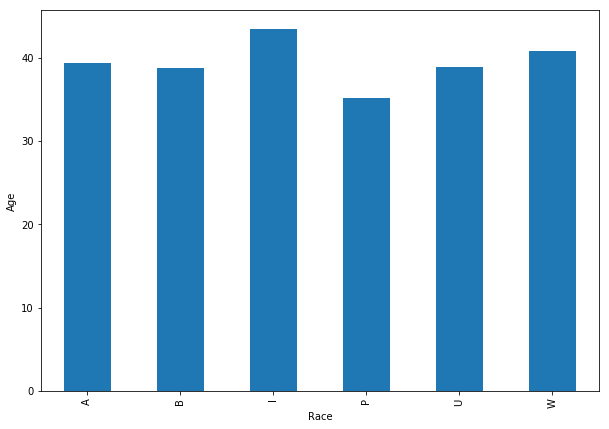

In [13]:
ax = plt.subplot()
ax.set_ylabel('Age')
data2.groupby('Race').mean()['Age'].plot(kind='bar', figsize=(10, 7), ax = ax);
plt.show()

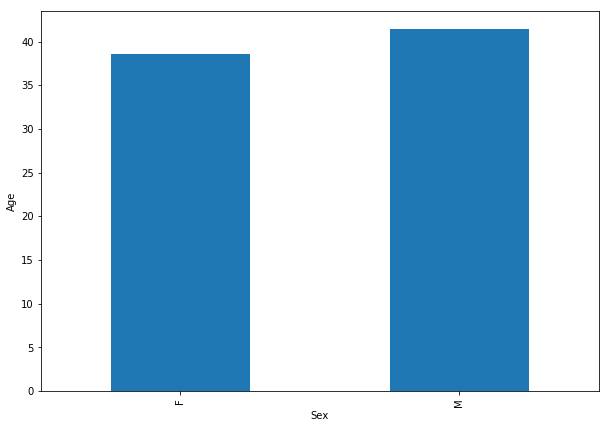

In [14]:
ax = plt.subplot()
ax.set_ylabel('Age')
data2.groupby('Sex').mean()['Age'].plot(kind='bar', figsize=(10, 7), ax = ax);
plt.show()

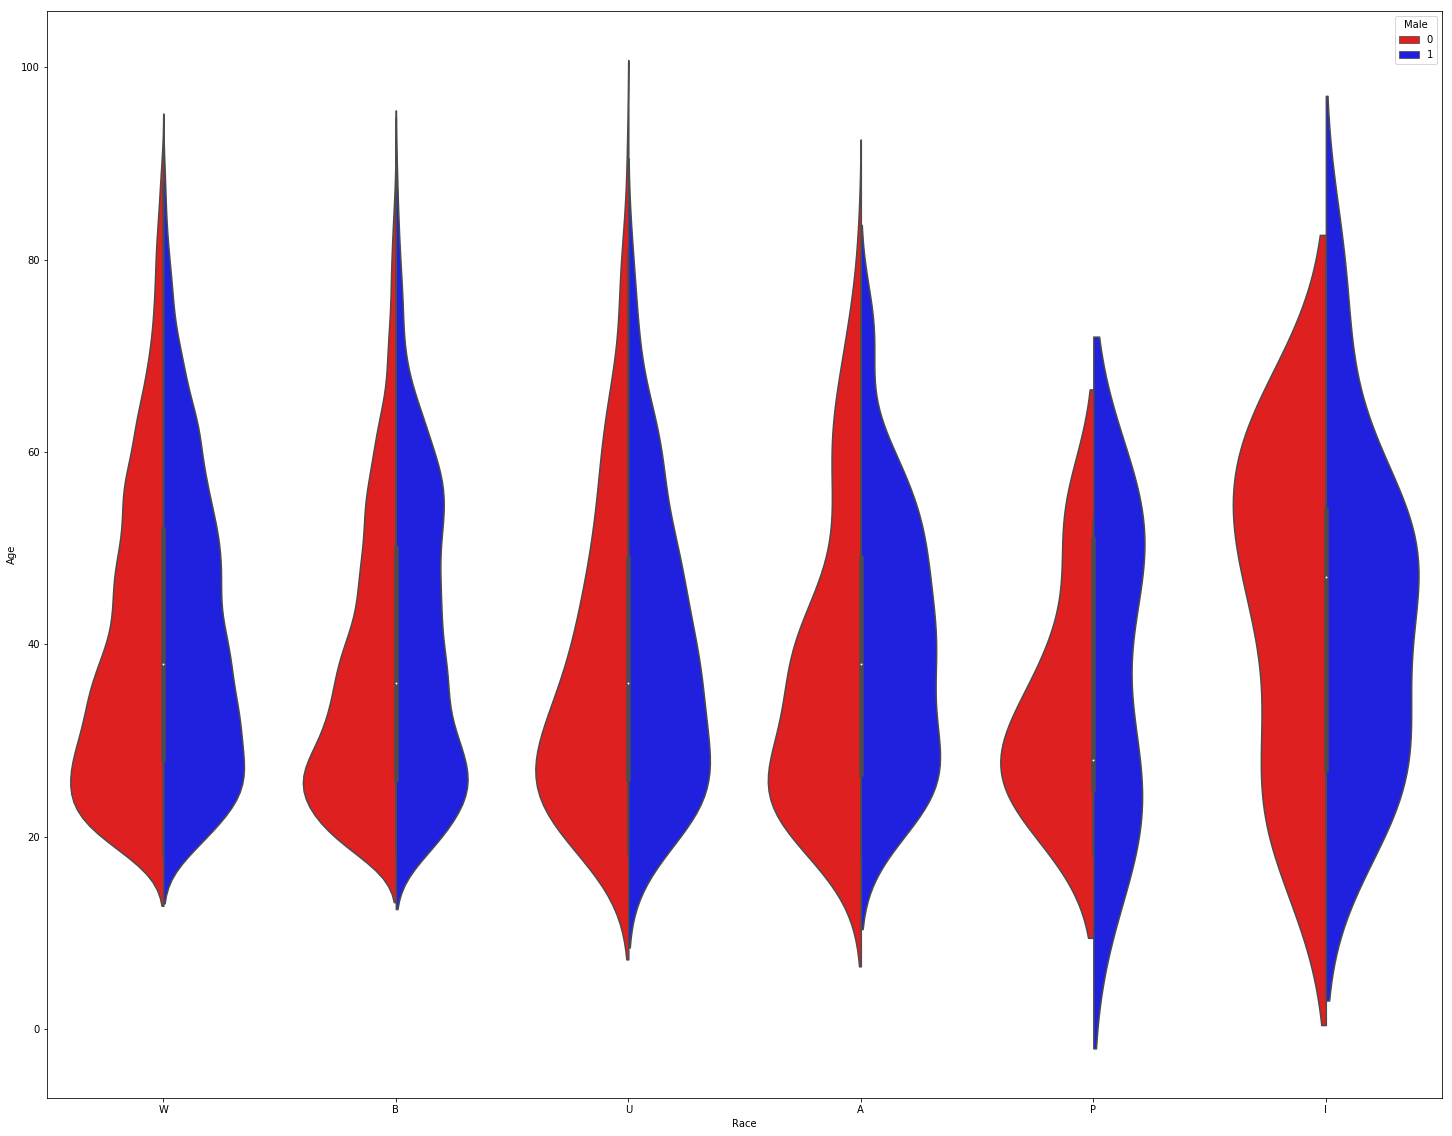

In [15]:
fig = plt.figure(figsize=(25, 20))
sns.violinplot(x='Race', y='Age', hue='Male', data=data2, split=True, palette={0: "r", 1: "b"});
plt.show()

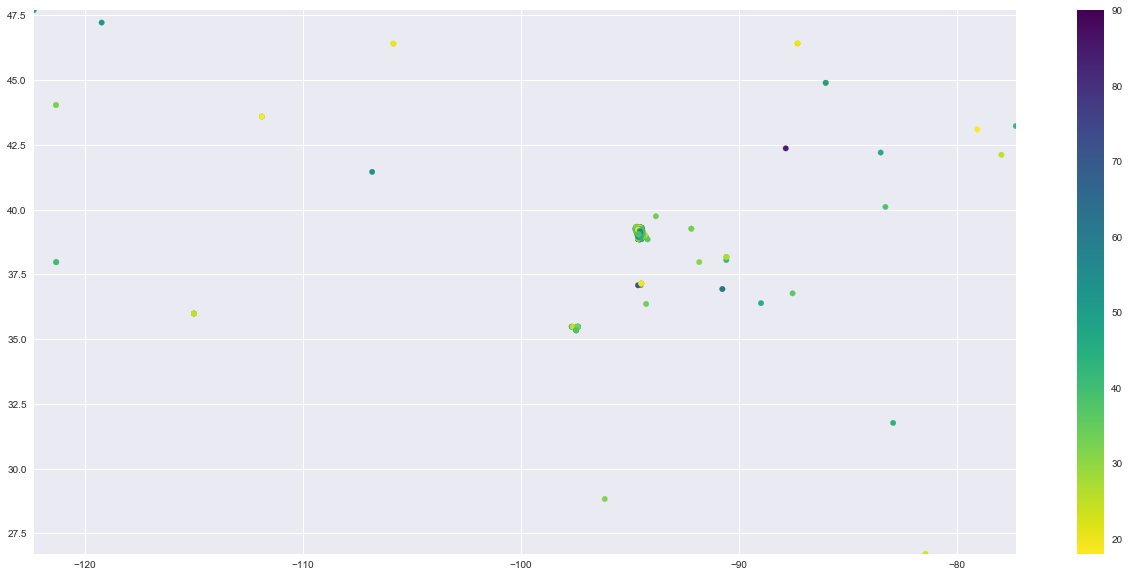

In [16]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(22,10))
plt.scatter(data2.Longitude, data2.Latitude, c=data2.Age, 
           cmap='viridis_r', s=30)
plt.xlim(-122.33, -77.29)
plt.ylim(26.71, 47.7)
plt.colorbar()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E59DCD6828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E59DFEBEB8>]], dtype=object)

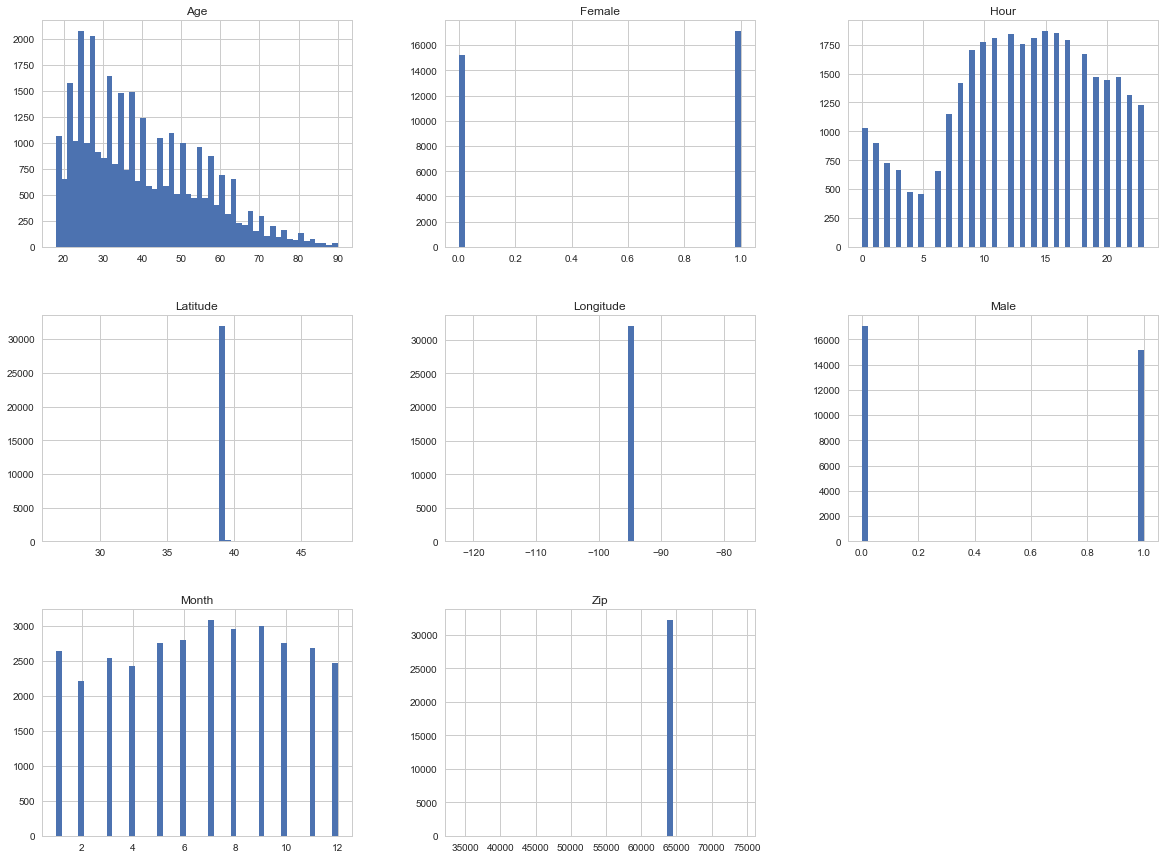

In [17]:
sns.set(style="whitegrid")
data2.hist(bins=50, figsize=(20,15))

In [18]:
data.head()

,Date,Hour,Crime,Zip,Race,Age,Firearm,Latitude,Longitude,Month,Gender
0,2017-05-28,3,Stolen_Property,64111,W,29.0,N,39.053635,-94.595998,5,0
1,2017-11-21,13,Homicide_Non_Negl,64105,B,69.0,Y,39.100910,-94.577328,11,0
2,2017-08-02,13,Auto_Theft,64119,W,31.0,N,39.177440,-94.572069,8,0
3,2017-08-24,16,Intimidation,64130,W,19.0,N,39.033505,-94.547812,8,0
4,2017-03-15,14,Auto_Theft,64157,W,62.0,N,39.235881,-94.466171,3,0


In [19]:
data = data.drop(['Race', 'Date'], axis=1)
data['Firearm'] = pd.Series(np.where(data.Firearm.values == 'Y', 1, 0), data.index)

In [20]:
data.head()

,Hour,Crime,Zip,Age,Firearm,Latitude,Longitude,Month,Gender
0,3,Stolen_Property,64111,29.0,0,39.053635,-94.595998,5,0
1,13,Homicide_Non_Negl,64105,69.0,1,39.100910,-94.577328,11,0
2,13,Auto_Theft,64119,31.0,0,39.177440,-94.572069,8,0
3,16,Intimidation,64130,19.0,0,39.033505,-94.547812,8,0
4,14,Auto_Theft,64157,62.0,0,39.235881,-94.466171,3,0


### get_dummies

In [21]:
crime_columns = pd.get_dummies(data['Crime'],prefix = "Crime")
data = pd.concat([data, crime_columns], axis=1)
data.drop('Crime', axis=1, inplace=True)
zip_columns = pd.get_dummies(data['Zip'],prefix = "Zip")
data = pd.concat([data, zip_columns], axis=1)
data.drop('Zip', axis=1, inplace=True)
month_columns = pd.get_dummies(data['Month'],prefix = "Month")
data = pd.concat([data, month_columns], axis=1)
data.drop('Month', axis=1, inplace=True)
age_columns = pd.get_dummies(data['Age'],prefix = "Age")
data = pd.concat([data, age_columns], axis=1)
data.drop('Age', axis=1, inplace=True)
hour_columns = pd.get_dummies(data['Hour'],prefix = "Hour")
data = pd.concat([data, hour_columns], axis=1)
data.drop('Hour', axis=1, inplace=True)

In [22]:
data.head()

,Firearm,Latitude,Longitude,Gender,Crime_Agg_Assault_Domest,Crime_Agg_Assault_Drive,Crime_Aggravated_Assault,Crime_Armed_Robbery,Crime_Arson,Crime_Attempted_Suicide,Crime_Auto_Theft,Crime_Auto_Theft_Outside,Crime_Bomb_Threat,Crime_Broken_Window,Crime_Burglary_Non_Resid,Crime_Burglary_Residence,Crime_Casualty,Crime_Counterfeiting,Crime_Credit_Debit_ATM_Card,Crime_DUI,Crime_Dead_Body,Crime_Disorderly_Conduct,Crime_Drunkenness,Crime_Embezzlement,Crime_Extortion_Blackmail,Crime_Failure_to_Return,Crime_False_Information,Crime_Family_Disturbance,Crime_Family_Offense,Crime_Forcible_Fondling,Crime_Forcible_Sodomy,Crime_Forgery,Crime_Fraud_Confidence_Gamb,Crime_Hacking_Computer,Crime_Hit_and_Run_Pers,Crime_Homicide_Non_Negl,Crime_Human_Trafficking,Crime_Identity_Theft,Crime_Impersonation,Crime_Interference,Crime_Intimidation,Crime_Invasion_of_Privacy,Crime_Justifiable_Homicide,Crime_Kidnapping_Abduction,Crime_Liquor_Law_Violaton,Crime_Misc_Violation,Crime_Missing_Runaway_Juvenile,Crime_Non_Agg_Assault_Dome,Crime_Non_Aggravated_Assau,Crime_Peeping_Tom,...,Age_65.0,Age_66.0,Age_67.0,Age_68.0,Age_69.0,Age_70.0,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_77.0,Age_78.0,Age_79.0,Age_80.0,Age_81.0,Age_82.0,Age_83.0,Age_84.0,Age_85.0,Age_86.0,Age_87.0,Age_88.0,Age_89.0,Age_90.0,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,39.053635,-94.595998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,39.100910,-94.577328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,39.177440,-94.572069,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,39.033505,-94.547812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,39.235881,-94.466171,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
data.shape

(32283, 301)

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [25]:
y = data["Gender"]
X = data.drop('Gender', axis=1)

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [27]:
X.head()

,Firearm,Latitude,Longitude,Crime_Agg_Assault_Domest,Crime_Agg_Assault_Drive,Crime_Aggravated_Assault,Crime_Armed_Robbery,Crime_Arson,Crime_Attempted_Suicide,Crime_Auto_Theft,Crime_Auto_Theft_Outside,Crime_Bomb_Threat,Crime_Broken_Window,Crime_Burglary_Non_Resid,Crime_Burglary_Residence,Crime_Casualty,Crime_Counterfeiting,Crime_Credit_Debit_ATM_Card,Crime_DUI,Crime_Dead_Body,Crime_Disorderly_Conduct,Crime_Drunkenness,Crime_Embezzlement,Crime_Extortion_Blackmail,Crime_Failure_to_Return,Crime_False_Information,Crime_Family_Disturbance,Crime_Family_Offense,Crime_Forcible_Fondling,Crime_Forcible_Sodomy,Crime_Forgery,Crime_Fraud_Confidence_Gamb,Crime_Hacking_Computer,Crime_Hit_and_Run_Pers,Crime_Homicide_Non_Negl,Crime_Human_Trafficking,Crime_Identity_Theft,Crime_Impersonation,Crime_Interference,Crime_Intimidation,Crime_Invasion_of_Privacy,Crime_Justifiable_Homicide,Crime_Kidnapping_Abduction,Crime_Liquor_Law_Violaton,Crime_Misc_Violation,Crime_Missing_Runaway_Juvenile,Crime_Non_Agg_Assault_Dome,Crime_Non_Aggravated_Assau,Crime_Peeping_Tom,Crime_Possession_Sale_Dist,...,Age_65.0,Age_66.0,Age_67.0,Age_68.0,Age_69.0,Age_70.0,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_77.0,Age_78.0,Age_79.0,Age_80.0,Age_81.0,Age_82.0,Age_83.0,Age_84.0,Age_85.0,Age_86.0,Age_87.0,Age_88.0,Age_89.0,Age_90.0,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,39.053635,-94.595998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,39.100910,-94.577328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,39.177440,-94.572069,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,39.033505,-94.547812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,39.235881,-94.466171,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
data.shape

(32283, 301)

In [29]:
data.head()

,Firearm,Latitude,Longitude,Gender,Crime_Agg_Assault_Domest,Crime_Agg_Assault_Drive,Crime_Aggravated_Assault,Crime_Armed_Robbery,Crime_Arson,Crime_Attempted_Suicide,Crime_Auto_Theft,Crime_Auto_Theft_Outside,Crime_Bomb_Threat,Crime_Broken_Window,Crime_Burglary_Non_Resid,Crime_Burglary_Residence,Crime_Casualty,Crime_Counterfeiting,Crime_Credit_Debit_ATM_Card,Crime_DUI,Crime_Dead_Body,Crime_Disorderly_Conduct,Crime_Drunkenness,Crime_Embezzlement,Crime_Extortion_Blackmail,Crime_Failure_to_Return,Crime_False_Information,Crime_Family_Disturbance,Crime_Family_Offense,Crime_Forcible_Fondling,Crime_Forcible_Sodomy,Crime_Forgery,Crime_Fraud_Confidence_Gamb,Crime_Hacking_Computer,Crime_Hit_and_Run_Pers,Crime_Homicide_Non_Negl,Crime_Human_Trafficking,Crime_Identity_Theft,Crime_Impersonation,Crime_Interference,Crime_Intimidation,Crime_Invasion_of_Privacy,Crime_Justifiable_Homicide,Crime_Kidnapping_Abduction,Crime_Liquor_Law_Violaton,Crime_Misc_Violation,Crime_Missing_Runaway_Juvenile,Crime_Non_Agg_Assault_Dome,Crime_Non_Aggravated_Assau,Crime_Peeping_Tom,...,Age_65.0,Age_66.0,Age_67.0,Age_68.0,Age_69.0,Age_70.0,Age_71.0,Age_72.0,Age_73.0,Age_74.0,Age_75.0,Age_76.0,Age_77.0,Age_78.0,Age_79.0,Age_80.0,Age_81.0,Age_82.0,Age_83.0,Age_84.0,Age_85.0,Age_86.0,Age_87.0,Age_88.0,Age_89.0,Age_90.0,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,39.053635,-94.595998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,39.100910,-94.577328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,39.177440,-94.572069,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,39.033505,-94.547812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,39.235881,-94.466171,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [30]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [31]:
def recover_train_test_target(data):    
    targets = pd.read_csv('kc_crime_for_visualizations.csv', usecols=['Sex'])['Sex'].values
    data = data.drop('Gender', axis=1)
    train = data.iloc[:32283]
    test = data.iloc[32283:]
    
    return train, test, targets

In [32]:
train, test, targets = recover_train_test_target(data)

In [33]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [34]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

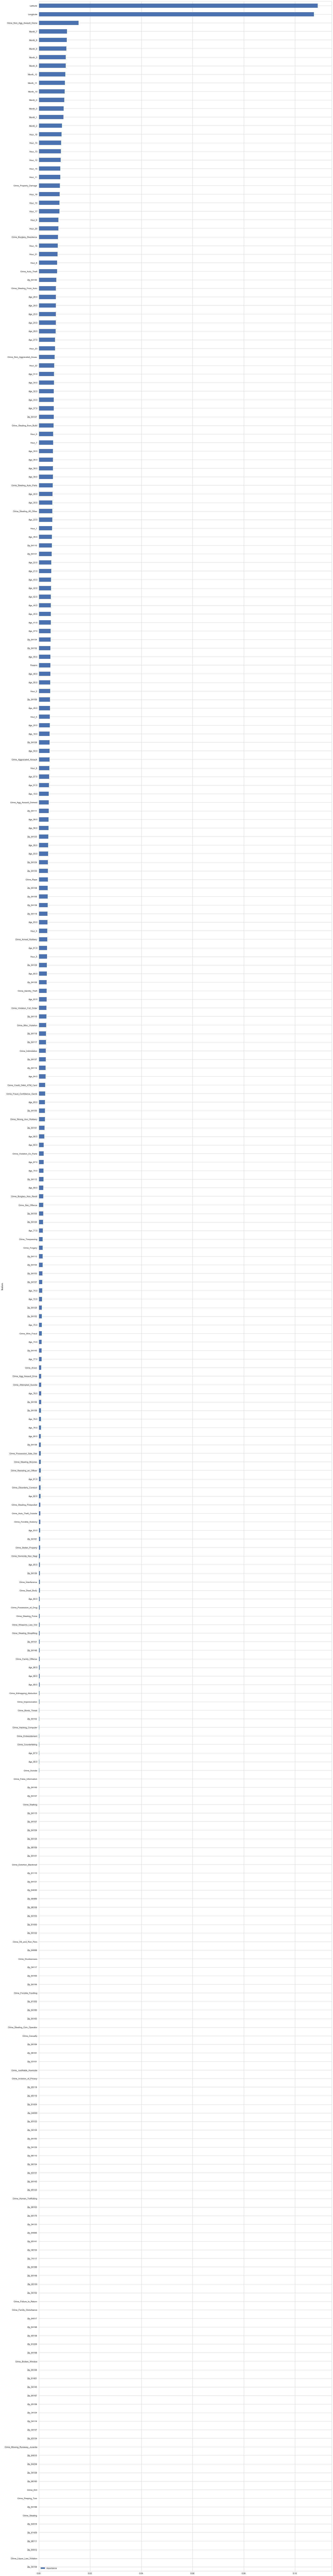

In [35]:
features.plot(kind='barh', figsize=(25, 225))
plt.show()

In [36]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=20)

models = [logreg, logreg_cv, rf, gboost]

In [37]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.555277026613385
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.5646321226360871
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.545427188805402
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.5581271749303707
****


In [38]:
model = GradientBoostingClassifier(verbose=1, random_state=20)
model.fit(train, targets)

      Iter       Train Loss   Remaining Time 
         1           1.3773           24.96s
         2           1.3728           25.55s
         3           1.3686           26.81s
         4           1.3654           26.09s
         5           1.3626           26.06s
         6           1.3601           25.62s
         7           1.3578           25.97s
         8           1.3558           25.53s
         9           1.3540           26.43s
        10           1.3524           25.85s
        20           1.3401           22.74s
        30           1.3325           18.74s
        40           1.3268           15.68s
        50           1.3220           12.97s
        60           1.3181           10.16s
        70           1.3142            7.63s
        80           1.3110            5.04s
        90           1.3078            2.49s
       100           1.3046            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=20, subsample=1.0, verbose=1,
              warm_start=False)

In [40]:
## turn run_gs to True if you want to run the gridsearch again.

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, 10, 20, 25],
                 'n_estimators': [50, 10, 20, 100, 200],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3,4,5,6,7,8,9, 10],
                 'min_samples_leaf': [2,3,4,5,6,7,8],
                 }
    boost = GradientBoostingClassifier()
    cross_validation = StratifiedKFold(n_splits=3)

    grid_search = GridSearchCV(boost,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1,
                               n_jobs=-1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'min_samples_leaf': 7, 
                  'n_estimators': 200, 'min_samples_split': 6, 
                  'max_features': 'log2', 'max_depth': 4}
    
    model = GradientBoostingClassifier(**parameters)
    model.fit(train, targets)

### Setting run_gs to "True" above produced the following below:

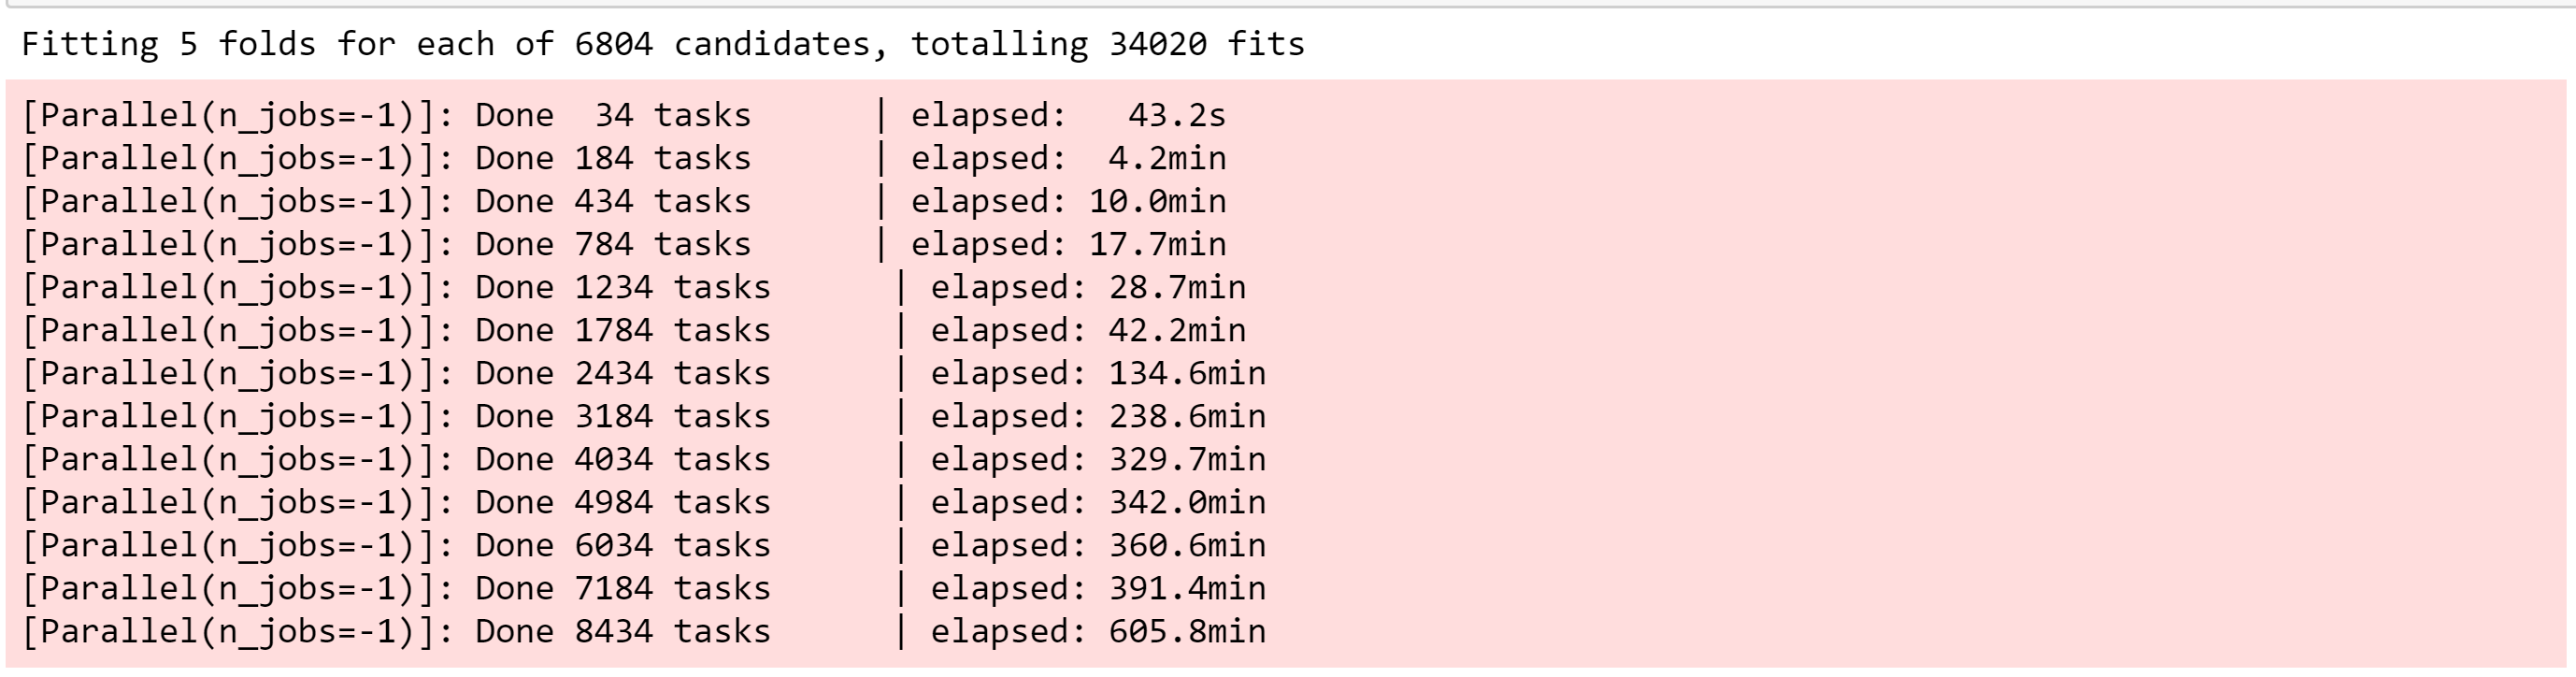

### 10 Hours in...25,586 fits remaining.  Averaging 14 per minute, it still needed another 30 hours.

### After removing n_estimators of 1000 and reducing # of folds from 5 to 3...

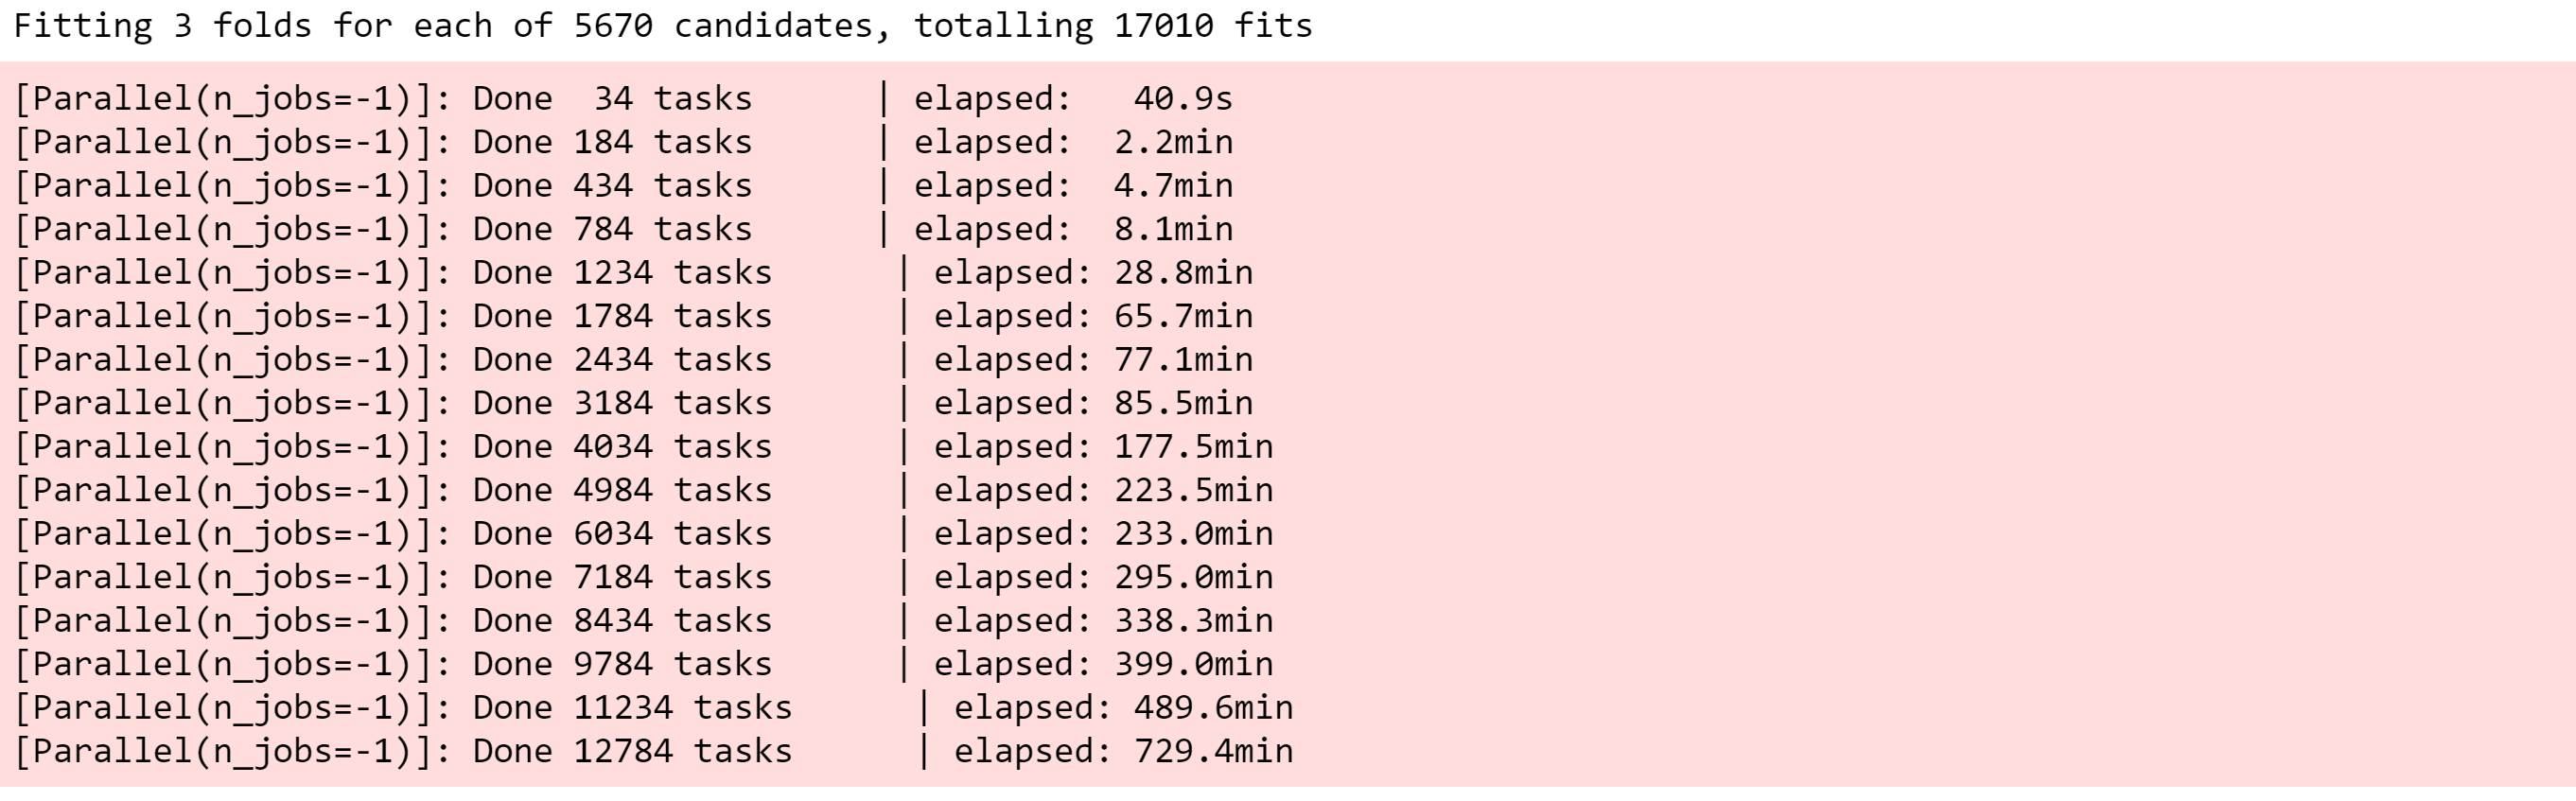

In [ ]:
scores = cross_val_score(model, train, targets, cv = 5, scoring='accuracy')
scores.mean()